### OverFitting
1. 일반화 차이(Generalization Gap) : 학습 오차와 테스트 오차의 차이 
    - 학습 오차와 테스트 오차의 관계
        - 학습 오차 큼, 일반화 차이 큼 : 언더피팅 
        - 학습 오차 큼, 일반화 차이 작음 : 언더피팅 
        - 학습 오차 작음, 일반화 차이 큼 : 오버피팅 
        - 학습 오차 작음, 일반화 차이 작음 : 이상적인 상태 
        - 즉, 학습 오차가 크면 언더 피팅, 학습 오차는 작은데 테스트 오차가 크면 오버 피팅   
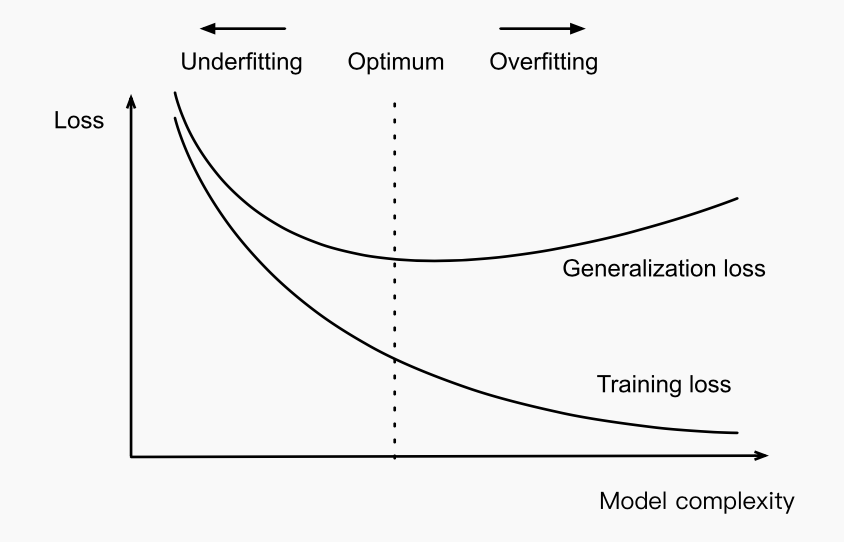

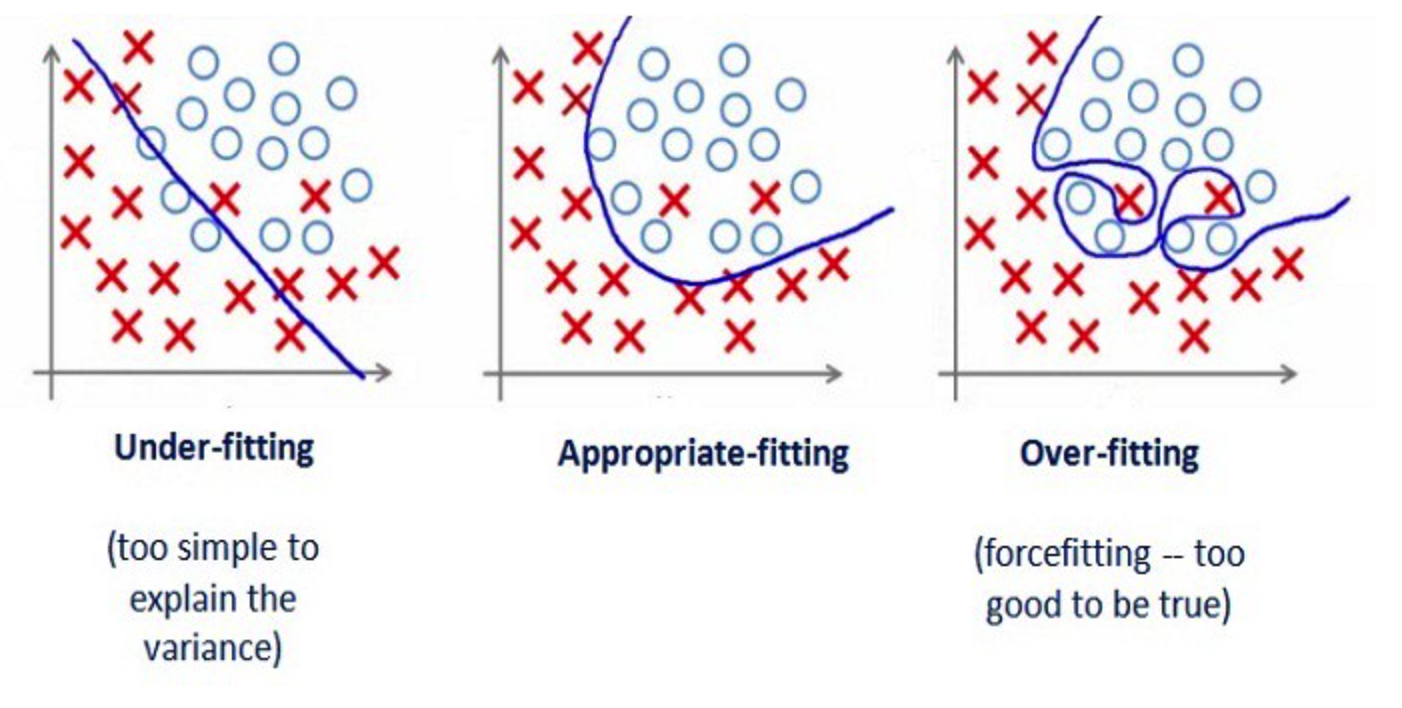

### Regularization
- 정형화(Regularization) : 어떤 제약 조건을 추가로 걸어줌으로써 오버피팅을 해결하려는 기법 
    - 대표적으로 L1 정형화, L2 정형화가 있음 
    - L1, L2 손실에 조건을 추가하는 것 
    - 데이터와 예측값의 오차를 줄이면서 작은 w값을 달성하는 것이 목표 
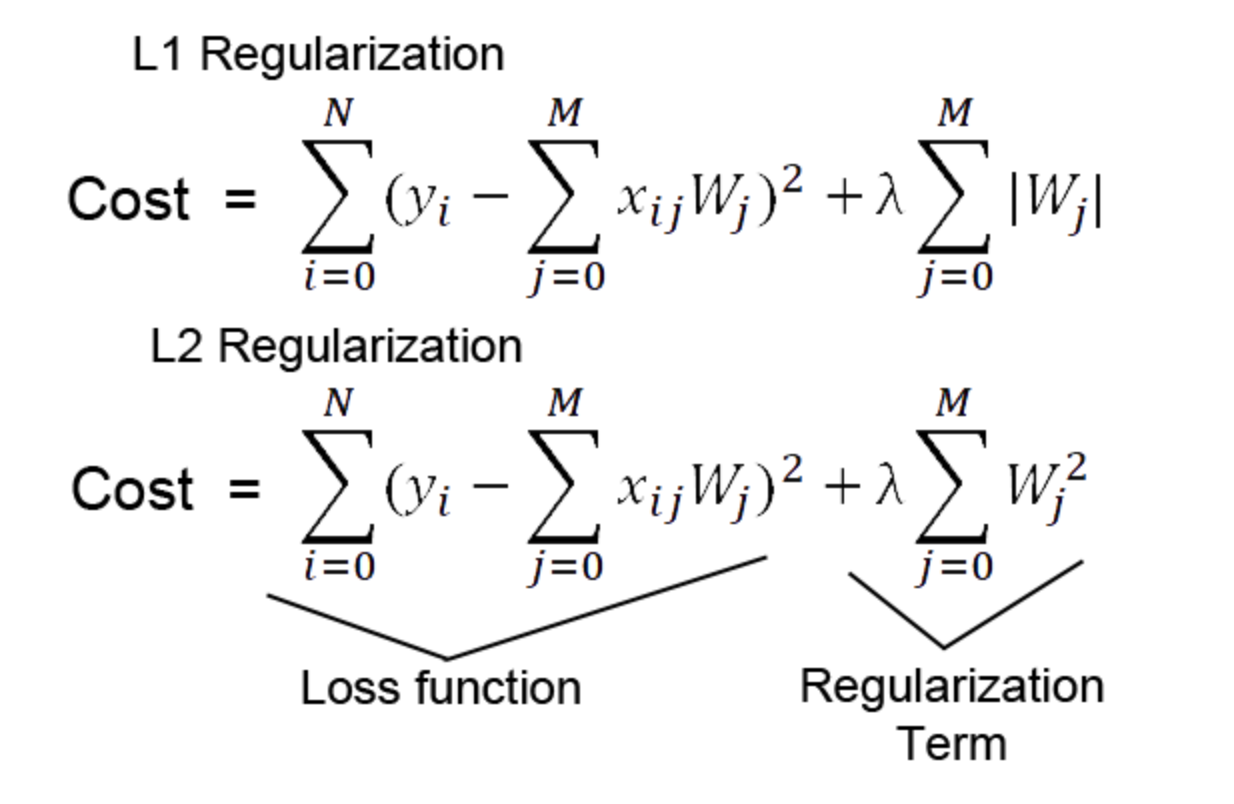

### L1과 L2 정형화의 차이 
- L2 정형화 
    - 수식적인 해를 구할 수 있다는 장점 
    - w의 제곱을 최소화하는 것이기 때문에 w값이 완전히 0이 되는 경우가 L1보다 적음 
- L1 정형화 
    - 절댓값때문에 정형화로 인해 생기는 비용이 직선의 형태를 띔 
    - w의 절댓값을 최소화하는 것이기 때문에 w값이 완전히 0이 되는 경우가 많음 
    - w가 0에 가깝거나 0이 되면 오차를 줄이는데 영향이 없는 성질을 이용해 이것이 특성 선택이라고 함 
* 학습할 때 L1 또는 L2를 사용하고 혹은 두개 전부 사용(Elastic Regularization)

#### 파이토치 정형화 방법

In [2]:
# torch.nn.MSELoss()를 수정 
# 가중치 값에 접근해서 절댓값을 합하거나 제곱의 합을 구해 평균제곱오차에 더해 이를 최적화 
# for m in self.modules():
#     m.weight.data

# torch.optim에 있는 최적화 함수에 가중치 부식 인수를 지정하는 것 

### Dropout
1. Dropout : 특정 뉴런의 확률 p를 0으로 바꾸는 것을 의미
    - Dropout을 사용하게 되면 이전 층에서 계산된 값들이 전달되지 않게 됨 
    - Dropout을 사용하게 되면 OverFitting될 확률을 줄일 수 있음 
2. Pytorch에서 Dropout을 사용하는 방법 
    - torch.nn.Dropout을 사용 
    - 하나의 층처럼 사용가능 
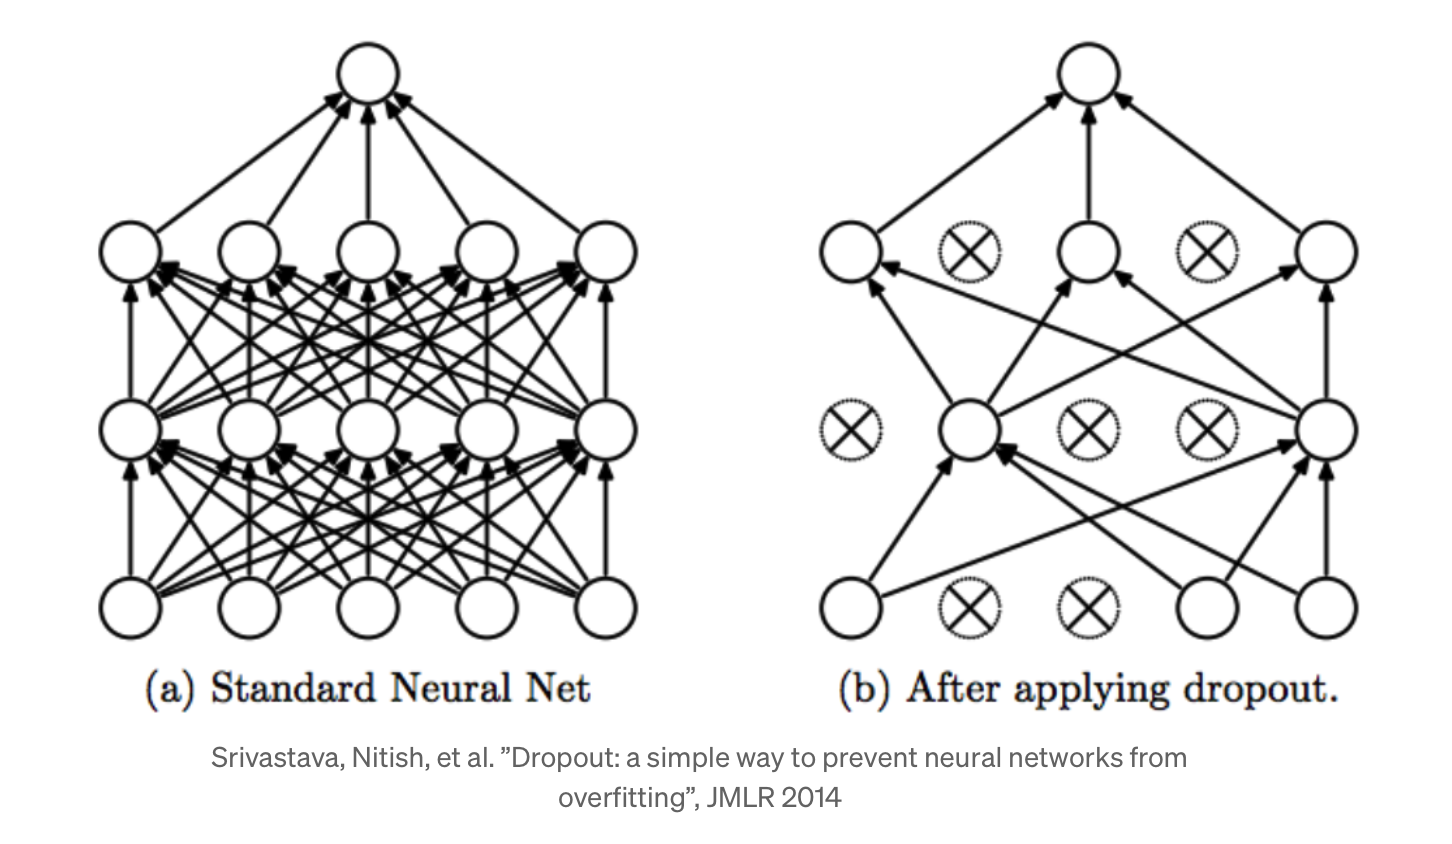


### Data Augmentation(데이터 증강)
1. 데이터를 늘리는 방법 
    - 이미지에서 많이 사용되는데 이미지를 돌리거나 뒤집는 것만 해도 데이터를 증강할 수 있다(사람의 눈으로는 별 차이가 없지만 컴퓨터가 보기엔 전혀 다른 수치이기 때문에)
    - 이미지를 뒤집거나 상화좌우 반전, 임의의 크기로 잘라내는 방법은 torchvision에 포함 

In [4]:
# image_data = dset.ImageFolder(img_dir, transforms.Compose([transforms.RandomSizedCrop(224), transforms.RandomHorizontalFlip(),transforms.TnTensor()]))

# lambda 함수 예시 
# def random_rotate2d(img):
#     rnad = random.randrange(0,360,90)
#     img = ndimage.interpolation.rotate(img,rand,reshape = False, oreder = 0, mode = 'reflect')
#     return img 

# transforms.Lambda(lambda x: random_rotate2d(x))

### Initialization(초기화)
1. 최적의 가중치가 존재한다고 사정하면 그 가중치 역시 값이기 때문에 최적의 값과 가까운 지점에서 시작할수록 빠르게 수렴할 수 있음 
    - 하지만 최적의 지점 자체가 모르는 값이기 때문에 근처에서 시작한다는 것은 성립할 수 없음 
    - 모델이 학습하면서 기울기 소실이나 기울기 과다와 같은 현상을 최고환 겪지 않게 하기 위해 사용 
    
2. Xavier Glorot 초기화 
    - 데이터가 몇 개의 Layer를 통과하더라도 활성화 값이 너무 커지거나 너무 작아지지 않고 일정한 범위 안에 있도록 잡아주는 초기화 방법 
    - 즉, 기울기 소실이나 기울기 과다 문제를 예방해줌 

3. Kaiming He 초기화 
    - 가중치를 특정 수식에 따라서 샘플링해서 초기화해줌 

4. 요약 
    - Sigmoid나 Tanh함수를 사용하는 경우 Xavier Glorot초기화를 사용 
    - ReLu를 사용하면 Kaiming He 초기화를 사용 
    

In [6]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN,self).__init__()
#         self.layer = nn.Sequential(
#             nn.Conv2d(1, 16, 3, padding = 1),
#             nn.ReLU(),
#             nn.Conv2d(16, 32, 3, padding = 1),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(32, 64, 3, padding = 1),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2)
#             )
#         self.fc_layer = nn.Sequential(
#             nn.Linear(64 * 7 * 7, 100),
#             nn.ReLU(),
#             nn.Linear(100, 10)
#         )
        
#         # initialization
        
#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 '''Init with small numbers
#                 m.weight.data.normal_(0.0, 0.02)
#                 m.bias.data.fill_(0)
                
#                 Xavier Initialization
#                 init.xavier_normal(m.weight.data)
#                 m.bias.data.fill_(0)
#                 '''
                
#                 # Kamming Initialization
#                 init.kaiming_cormal(m.weight.data)
#                 m.bias.data.fill_(0)
#             elif isinstance(m, nn.Linear):
#                 '''Init with small numbers
#                 m.weight.data.normal_(0.0, 0.02)
#                 m.bias.data.fill_(0)
                
#                 Xavier Initialization 
#                 init.xavier_normal(m.weight.data)
#                 m.bias.data.fill_(0)
#                 '''
                
#                 # Kaming Initialization
#                 init.kaiming_normal(m.weight.data)
#                 m.bias.data.fill_(0)

### Learning Rate
1. 적절한 모델, 적절한 초깃값을 설정했음에도 학습률에 따라 모델의 학습이 달라질 수 있다.
    - 학습률이 너무 높다면 업데이트 방향이 맞아도 너무 크게 업데이트가 됨 
    - 학습률이 너무 낮다면 지역적인 공간에서 극솟값에만 도달하므로 너무 적게 업데이트가 됨 
    - 따라서 적절한 학습률을 찾아서 최소의 손실값을 찾을 수 있음 
    - 실무에서는 초기에 비교적 높은 학습률로 시작하여 점차 학습률을 낮추는 전략을 사용 
    - torch.optim에 구현 
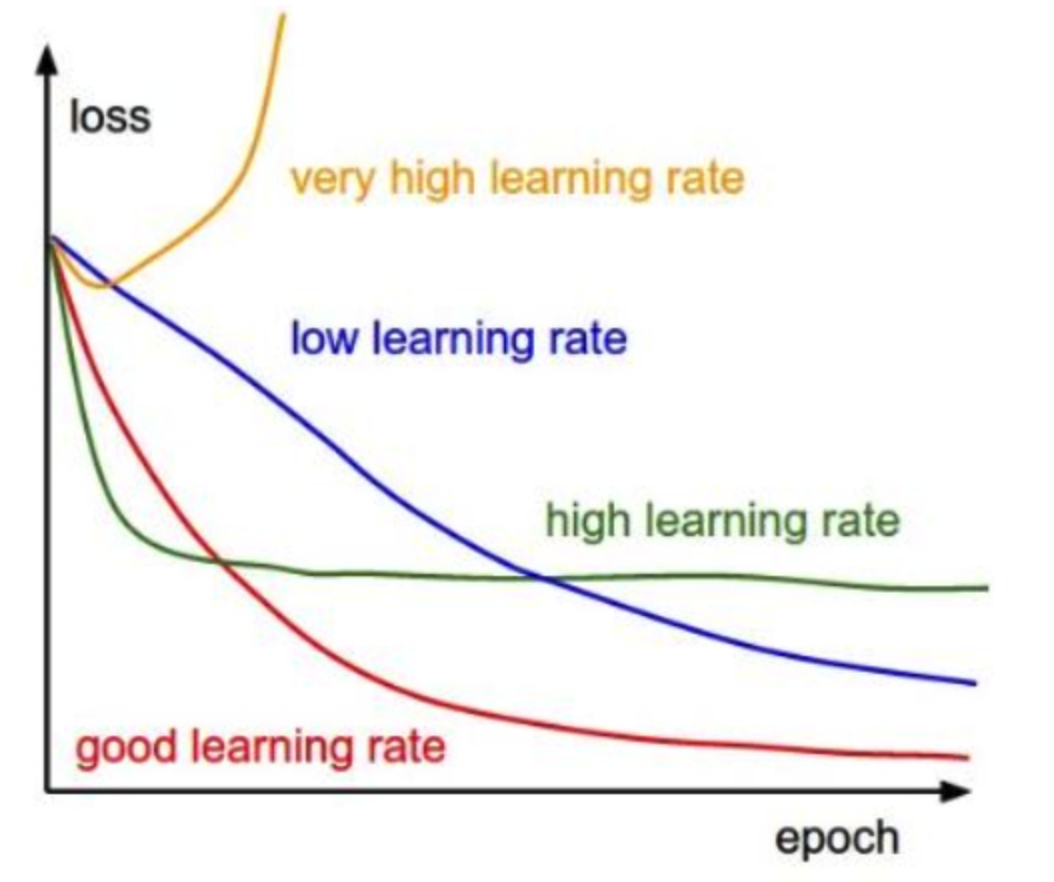

In [8]:
# torch.optim.lr_scheduler.StepLR
    # StepLR 함수는 지정한 epoch마다 학습률에 gamma를 곱해서 감소시키는 것
# torch.optim.lr_scheduler.ExponentialLR
    # ExponentialLR 함수는 매 epochs마다 학습률에 gamma를 곱해서 감소시키는 것 
# torch.optim.lr_scheduler.MultiStepLR
    # MultiStepLR 함수는 더 유연하게 step_size를 milestones인수에 리스트로 받아서 원하는 지점마다 학습률을 감소 

In [10]:
# loss_func = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# scheduler = lr_scheduler.StepLR(optimizer, step_size = 1, gamma = 0.99)

# for i in range(num_epochs):
#     scheduler.step()
    
# for j, [image, label] in enumerate(train_loader):
#     x = image.cuda()
#     y_ = label.cuda()
    
#     optimizer.zero_grad()
#     output = model.forward(x)
#     loss = loss_func(output, y_)
#     loss.backward()
#     optimizer.step()
    
# print(i, scheduler.get_lr())

### Normalization 
1. 학습데이터에서 잘 동작하는데 테스트 데이터에서는 학습이 제대로 안되면 단순히 오버피팅 문제가 아니라 두 데이터의 분포다 달라서 발생하는 영우도 있음 
2. 이러한 경우에 필요한 것이 Normalization 
    - Standardization(표준화) 
        - 데이터에서 평균을 빼고 표준편차로 나눠주는 과정을 거침 
        - torchvision의 transform함수를 사용 
        
    - MinMax Standardization(최소극대화 정규화)
        - 데이터를 주로 0 ~.  사이로 압축하거나 늘리는 방법 
        
3. Normalization을 하게 되면 일반적으로 학습이 더 잘됨 
     - 정규화 X : 업데이트 과정에서 지그재그 모양으로 불필요한 업데이트가 많고 횟수도 많이 필요 
         - 데이터의 각 요소별 범위가 다르기 때문에 위와 같은 문제가 발생 
     - 정규화 O : 불필요한 업데이트가 적고 더 큰 학습률을 적용 가능 
         - 데이터의 각 요소별 범위가 비슷하기 때문에 삐른 시간에 손실이 최소가 되는 지점에 도달 가능 
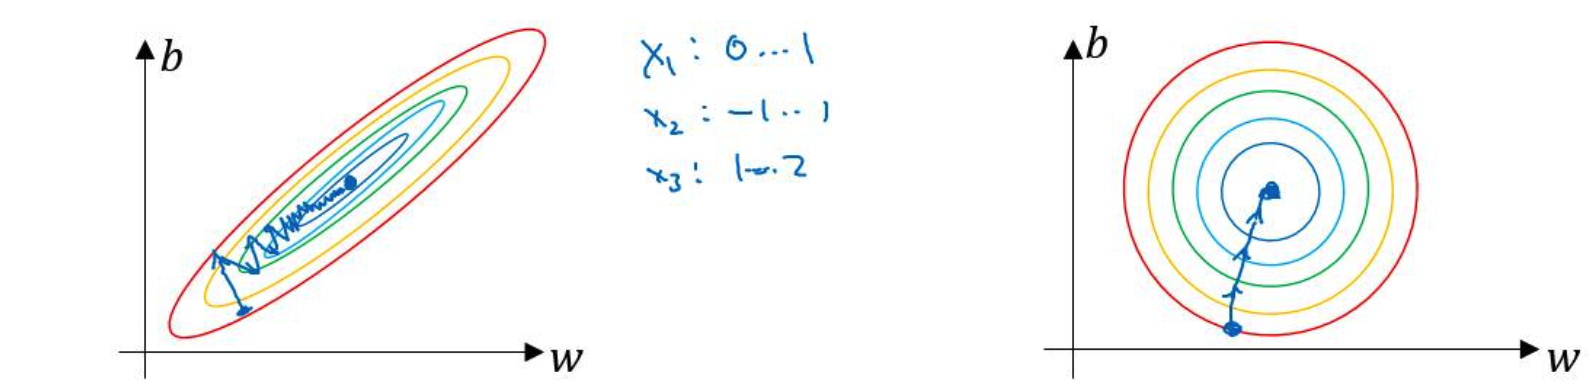

In [12]:
# # Standardization 
# transform = transforms.Compose([
#     trasforms.ToTensor(),
#     transforms.Normalize(mean = (0.485, 0.456, 0.406),
#                          std = (0.229, 0.224, 0.225))
# ])

In [13]:
# # MinMax Standardization 
# x = (x - x.min()) / (x.max() - x.min())

### Batch Normalization 
1. 하나의 신경망에 대해 입력의 범위가 바뀌는 것을 공변향 변화라고 하는데 딥러닝 모델 내부에서도 하나의 은닉층에 여러 범위의 입력이 들어오는 내부 공변량 변화가 일어나기 때문에 이것을 해결하기 위한 방법 
2. 한 번에 입력으로 들어오는 배치 단위로 정규화하는 것을 의미 
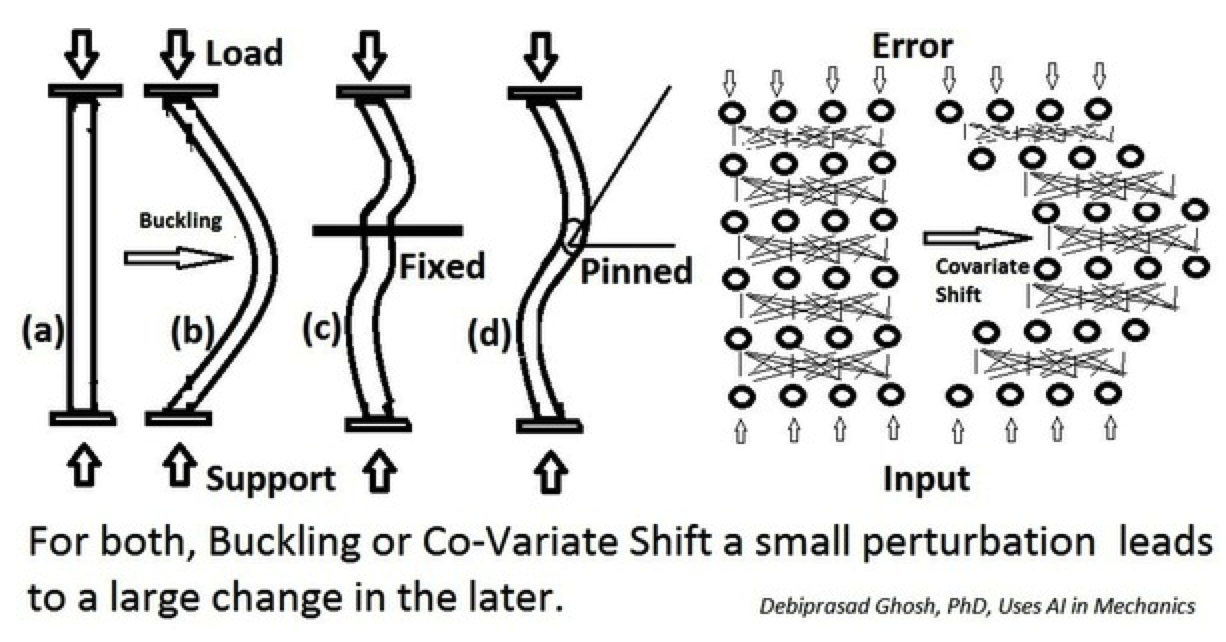

In [14]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN,self).__init__()
#         self.layer = nn.Sequential(
#             nn.Conv2d(1, 16, 3, padding = 1),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.Conv2d(16, 32, 3, padding = 1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(32, 64, 3, padding = 1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2)
#             )
#         self.fc_layer = nn.Sequential(
#             nn.Linear(64 * 7 * 7, 100),
#             nn.BatchNorm2d(100),
#             nn.ReLU(),
#             nn.Linear(100, 10)
#         )
        

In [15]:
# # 정확도 평가 

# correct = 0
# total = 0

# with torch.no_grad():
#     for image, label in test_loader:
#         output = model.forward(image)
#         _, output_index = torch.max(output,1)
#         total += label.size(0)
#         correct += (output_index == label).sum().float()
        
# print('Accuracy of Test Data : {}'.format(100 * correct / total))

### Gradient Descent 
1. 작은 데이터 : 모든 데이터를 한 번에 다 보고 업데이트
2. 보통 일정 배치 사이즈 만큼씩 데이터를 불러와서 연산을 시행 
3. 우리가 사용한 코드에서는 보통 SGD 방법을 사용 
    - SGD 방법은 손실을 최소화하는 지점까지 도달하기에 시간이 오래 걸림 
4. 가속도의 개념을 추가한 경사하강법 
    - 같은 방향으로 업데이트가 여러 번 일어나게 되면 해당 방향으로 점점 가속도가 붙어 더 많이 업데이트함으로써 빠르게 최소 지점에 가까워 지는 것 
5. 네스테로프 가속 경사하강법 
    - 가속도 자체는 현재 시점 이전 즉, 과거의 값들로 구해진 값이기 때문에 현재 시점의 기울기가 어떻게 나오든 무관하게 업데이트 될 값이라는 관점 

In [16]:
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# 이거 말고도 다른 알고리즘이 구현되어 있음 